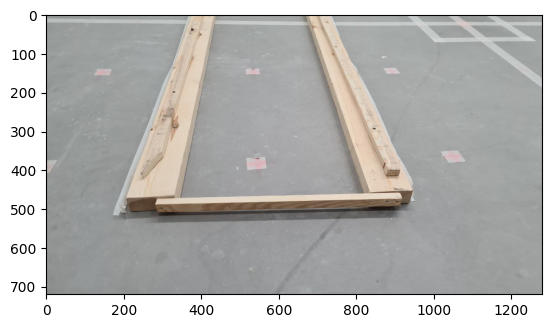

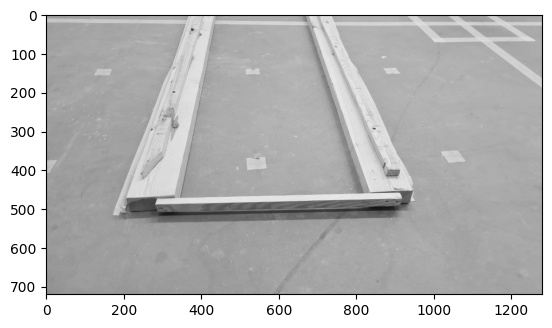

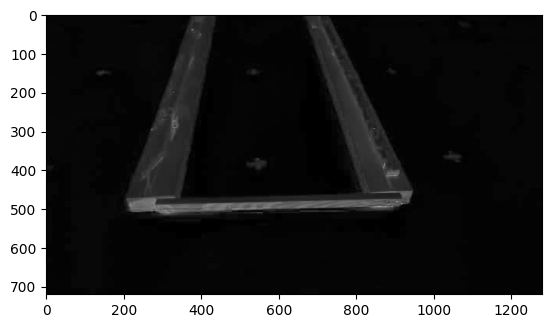

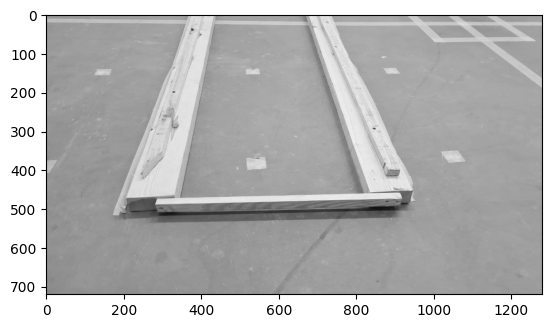

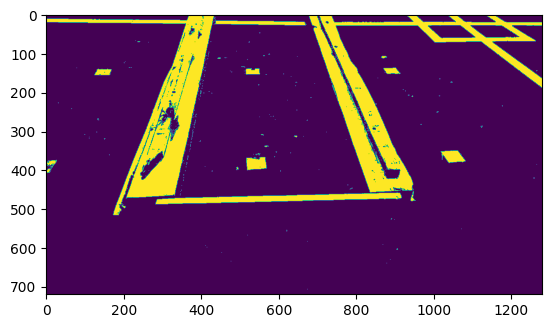

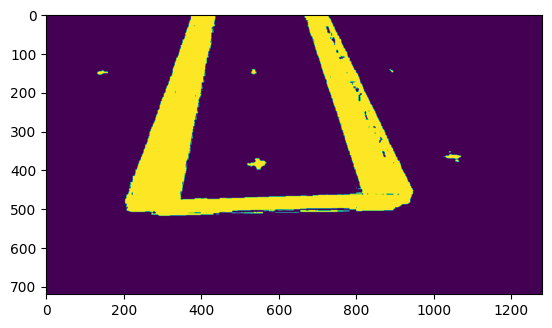

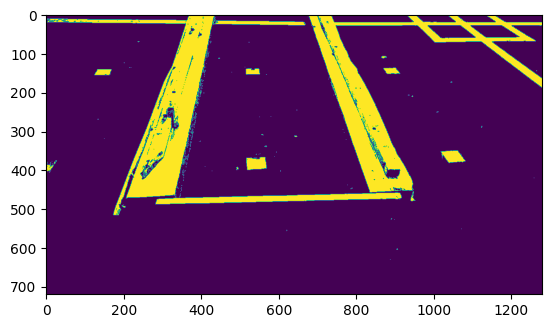

In [13]:
import numpy as np
import matplotlib.pyplot as plt
import cv2

img = cv2.imread('rails.jpg')
img = cv2.cvtColor(img, cv2.COLOR_RGB2BGR)

gray = cv2.cvtColor(img, cv2.COLOR_RGB2GRAY)

hsv = cv2.cvtColor(img, cv2.COLOR_RGB2HSV)

g_ret, g_otsu = cv2.threshold(gray, 0, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU)
s_ret, s_otsu = cv2.threshold(hsv[:, :, 1], 0, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU)
v_ret, v_otsu = cv2.threshold(hsv[:, :, 2], 0, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU)

plt.imshow(img)
plt.show()

plt.imshow(gray, cmap='gray')
plt.show()

# plt.imshow(hsv[:, :, 0], cmap='gray')
# plt.show() #этот канал несет мало информации для нас

plt.imshow(hsv[:, :, 1], cmap='gray')
plt.show()

plt.imshow(hsv[:, :, 2], cmap='gray')
plt.show()

plt.imshow(g_otsu)
plt.show()

plt.imshow(s_otsu)
plt.show()

plt.imshow(v_otsu)
plt.show()

Будем работать с маской, полученной путем бинаризации Оцу для Saturation канала исходного изображения

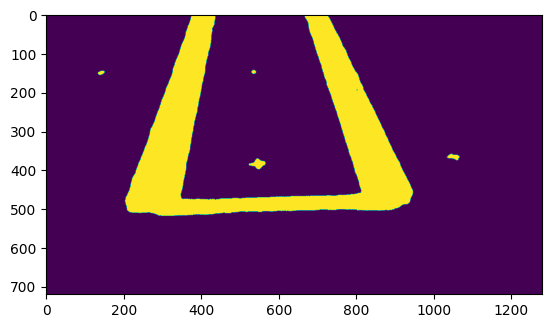

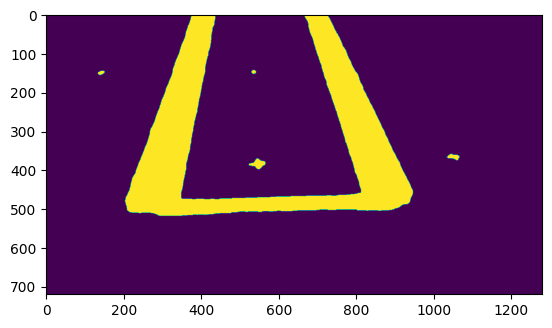

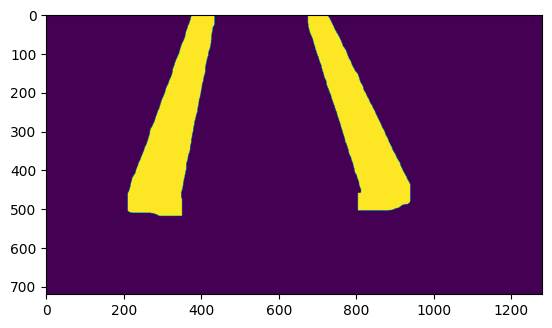

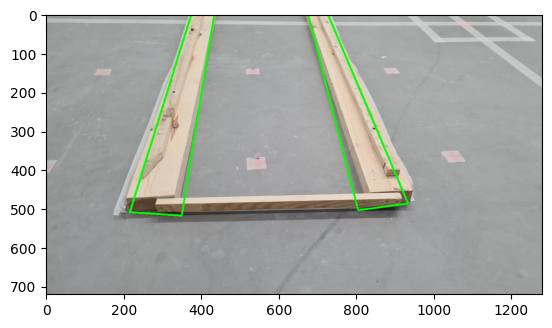

In [44]:
import numpy as np
import matplotlib.pyplot as plt
import cv2

img = cv2.imread('rails.jpg')
img = cv2.cvtColor(img, cv2.COLOR_RGB2BGR)

blurred = cv2.blur(img, (11, 11))

# plt.imshow(img)
# plt.show()

# plt.imshow(blurred)
# plt.show()

hsv = cv2.cvtColor(blurred, cv2.COLOR_RGB2HSV)

s_ret, s_otsu = cv2.threshold(hsv[:, :, 1], 0, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU)


# plt.imshow(hsv[:, :, 1], cmap='gray')
# plt.show() 
cl_ker = np.ones((9, 9), np.uint8)
closed = cv2.morphologyEx(s_otsu, cv2.MORPH_CLOSE, cl_ker)

op_ker = np.ones((45, 45), np.uint8)
opened = cv2.morphologyEx(closed, cv2.MORPH_OPEN, op_ker)

plt.imshow(s_otsu)
plt.show()

plt.imshow(closed)
plt.show()

plt.imshow(opened)
plt.show()

contours, _ = cv2.findContours(opened, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_NONE)

filtered = []

for cnt in contours:
    length = cv2.arcLength(cnt, True)
    
    if (length > 1000):
        approx = cv2.approxPolyDP(cnt, length * 0.03, True)
        
        filtered.append(approx)
    
    
cv2.drawContours(img, filtered, -1, (0, 255, 0), 3)

plt.imshow(img)
plt.show()
